<hr>
<h1>Reference:</h1>
https://stats.stackexchange.com/questions/8407/import-stock-price-from-yahoo-finance-into-r <br>
https://cran.r-project.org/web/packages/quantmod/quantmod.pdf <br>
<hr>

In [1]:
# Get quantmod
if (!require("quantmod")) {
    install.packages("quantmod")
    library(quantmod)
}

start <- as.Date("1970-01-01")
end <- as.Date("2019-04-20")

# Let's get Apple stock data; Apple's ticker symbol is AAPL. We use the
# quantmod function getSymbols, and pass a string as a first argument to
# identify the desired ticker symbol, pass 'yahoo' to src for Yahoo!
# Finance, and from and to specify date ranges

# The default behavior for getSymbols is to load data directly into the
# global environment, with the object being named after the loaded ticker
# symbol. This feature may become deprecated in the future, but we exploit
# it now.

getSymbols("AAPL", src = "yahoo", from = start, to = end)

Loading required package: quantmod
Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).
Warning message:
"AAPL contains missing values. Some functions will not work if objects contain m

[1] "AAPL"

In [4]:
class(AAPL)

[1] "xts" "zoo"

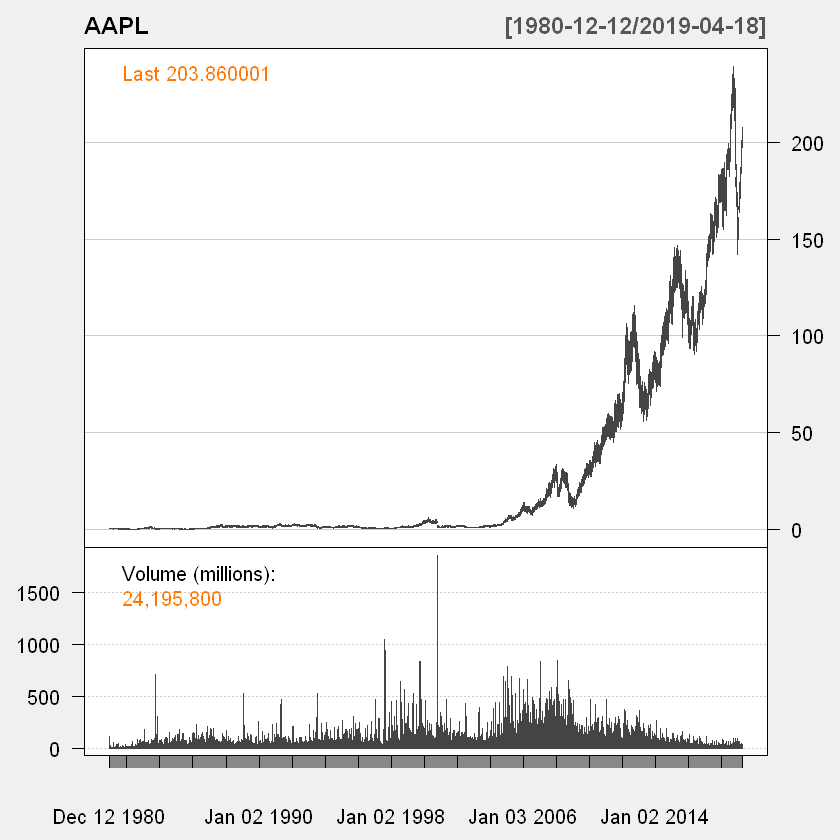

In [5]:
candleChart(AAPL, up.col='green', down.col='red', theme='white')

In [6]:
# convert AAPL xts objecct to a dataframe called df_AAPL
# also convert the index to a column calle date into the data frame
df <- data.frame(date=index(AAPL), coredata(AAPL))

In [32]:
head(df)

date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted
1980-12-12,11.456,11.506,11.456,0.513393,117258400,0.023007
1980-12-15,10.908,10.908,10.858,0.486607,43971200,0.021807
1980-12-16,10.111,10.111,10.062,0.450893,26432000,0.020206
1980-12-17,10.311,10.361,10.311,0.462054,21610400,0.020706
1980-12-18,10.609,10.659,10.609,0.475446,18362400,0.021307
1980-12-19,11.257,11.307,11.257,0.504464,12157600,0.022607


# renaming columns in R
http://rprogramming.net/rename-columns-in-r/

In [57]:
names(df) <- c("Date", "Open", "High", "Low", "Close", "Volume", "Adjusted")
head(df)

Date,Open,High,Low,Close,Volume,Adjusted
1980-12-12,11.456,11.506,11.456,0.513393,117258400,0.023007
1980-12-15,10.908,10.908,10.858,0.486607,43971200,0.021807
1980-12-16,10.111,10.111,10.062,0.450893,26432000,0.020206
1980-12-17,10.311,10.361,10.311,0.462054,21610400,0.020706
1980-12-18,10.609,10.659,10.609,0.475446,18362400,0.021307
1980-12-19,11.257,11.307,11.257,0.504464,12157600,0.022607


In [58]:
df$Symbol <- 'AAPL'
head(df)

Date,Open,High,Low,Close,Volume,Adjusted,Symbol
1980-12-12,11.456,11.506,11.456,0.513393,117258400,0.023007,AAPL
1980-12-15,10.908,10.908,10.858,0.486607,43971200,0.021807,AAPL
1980-12-16,10.111,10.111,10.062,0.450893,26432000,0.020206,AAPL
1980-12-17,10.311,10.361,10.311,0.462054,21610400,0.020706,AAPL
1980-12-18,10.609,10.659,10.609,0.475446,18362400,0.021307,AAPL
1980-12-19,11.257,11.307,11.257,0.504464,12157600,0.022607,AAPL


# how to use ifelse function in R

In [60]:
df$UpDown <- ifelse (df$Open - df$Close >= 0, 0, 1)
df$up_down <- NULL # To remove a column in R set it to NULL
head(df)

Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown
1980-12-12,11.456,11.506,11.456,0.513393,117258400,0.023007,AAPL,0
1980-12-15,10.908,10.908,10.858,0.486607,43971200,0.021807,AAPL,0
1980-12-16,10.111,10.111,10.062,0.450893,26432000,0.020206,AAPL,0
1980-12-17,10.311,10.361,10.311,0.462054,21610400,0.020706,AAPL,0
1980-12-18,10.609,10.659,10.609,0.475446,18362400,0.021307,AAPL,0
1980-12-19,11.257,11.307,11.257,0.504464,12157600,0.022607,AAPL,0


In [61]:
df$PercentChange <- ((df$Close - df$Open)/df$Open) * 100
head(df)


Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange
1980-12-12,11.456,11.506,11.456,0.513393,117258400,0.023007,AAPL,0,-95.51857
1980-12-15,10.908,10.908,10.858,0.486607,43971200,0.021807,AAPL,0,-95.53899
1980-12-16,10.111,10.111,10.062,0.450893,26432000,0.020206,AAPL,0,-95.54057
1980-12-17,10.311,10.361,10.311,0.462054,21610400,0.020706,AAPL,0,-95.51882
1980-12-18,10.609,10.659,10.609,0.475446,18362400,0.021307,AAPL,0,-95.51847
1980-12-19,11.257,11.307,11.257,0.504464,12157600,0.022607,AAPL,0,-95.51866


In [79]:
# Total number of rows in the data frame
nrow(df)

head(df)

[1] 9670

Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange
1980-12-12,11.456,11.506,11.456,0.513393,117258400,0.023007,AAPL,0,-95.51857
1980-12-15,10.908,10.908,10.858,0.486607,43971200,0.021807,AAPL,0,-95.53899
1980-12-16,10.111,10.111,10.062,0.450893,26432000,0.020206,AAPL,0,-95.54057
1980-12-17,10.311,10.361,10.311,0.462054,21610400,0.020706,AAPL,0,-95.51882
1980-12-18,10.609,10.659,10.609,0.475446,18362400,0.021307,AAPL,0,-95.51847
1980-12-19,11.257,11.307,11.257,0.504464,12157600,0.022607,AAPL,0,-95.51866


In [90]:
# total number of rows in the data frame
nrow(is.na(df))

# find the max open price for AAPL
max(df$Open, na.rm=TRUE)

# find the min open price for AAPL
min(df$Open, na.rm=TRUE)

# find the max Percent Change for AAPL
max(df$PercentChange, na.rm=TRUE)

# find the min Percent Change for AAPL
min(df$PercentChange, na.rm=TRUE)



[1] 9670

[1] 232.578

[1] 0.69

[1] 5.528548

[1] -96.15591

In [3]:
# find the row with the max open price for AAPL
df[df$Open == max(df$Open, na.rm=TRUE),]

# find the row with the lowest open price for AAPL
df[df$Open == min(df$Open, na.rm=TRUE),]


ERROR: Error in df$Open: object of type 'closure' is not subsettable


In [93]:
df.omit <- na.omit(df)

# total number of rows in the data frame
nrow(is.na(df.omit))

# find the max open price for AAPL
max(df.omit$Open, na.rm=TRUE)

# find the min open price for AAPL
min(df.omit$Open, na.rm=TRUE)

# find the max Percent Change for AAPL
max(df.omit$PercentChange, na.rm=TRUE)

# find the min Percent Change for AAPL
min(df.omit$PercentChange, na.rm=TRUE)


[1] 9669

[1] 232.578

[1] 0.69

[1] 5.528548

[1] -96.15591

In [94]:
# When was the worst time for AAPL stock?
df.omit[df.omit$PercentChange == min(df.omit$PercentChange, na.rm=TRUE),]

,Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange
1732,1987-10-19,33.911,33.911,24.95,1.303571,1.19e+08,0.066242,AAPL,0,-96.15591


<h3>Answer:</h3>
October 19, 1987 
https://www.forbes.com/sites/johndobosz/2012/10/19/crash-of-1987-haunts-this-october-stock-market/#6b7f36615e8e <br>

In [89]:
head(df.omit)

Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange
1980-12-12,11.456,11.506,11.456,0.513393,117258400,0.023007,AAPL,0,-95.51857
1980-12-15,10.908,10.908,10.858,0.486607,43971200,0.021807,AAPL,0,-95.53899
1980-12-16,10.111,10.111,10.062,0.450893,26432000,0.020206,AAPL,0,-95.54057
1980-12-17,10.311,10.361,10.311,0.462054,21610400,0.020706,AAPL,0,-95.51882
1980-12-18,10.609,10.659,10.609,0.475446,18362400,0.021307,AAPL,0,-95.51847
1980-12-19,11.257,11.307,11.257,0.504464,12157600,0.022607,AAPL,0,-95.51866


In [97]:
# syntax to get the help page for getSymbols() function in from quantmod
?getSymbols

In [98]:
# Get the dimension of the dataframe
dim(df)

[1] 9670   10

Answer: 9670 rows with 10 columns or variables

In [100]:
# Add a new column DayOfWeek to the data frame
df$DayOfWeek <- weekdays(as.Date(df$Date))
head(df)

Date,Open,High,Low,Close,Volume,Adjusted,Symbol,UpDown,PercentChange,DayOfWeek
1980-12-12,11.456,11.506,11.456,0.513393,117258400,0.023007,AAPL,0,-95.51857,Friday
1980-12-15,10.908,10.908,10.858,0.486607,43971200,0.021807,AAPL,0,-95.53899,Monday
1980-12-16,10.111,10.111,10.062,0.450893,26432000,0.020206,AAPL,0,-95.54057,Tuesday
1980-12-17,10.311,10.361,10.311,0.462054,21610400,0.020706,AAPL,0,-95.51882,Wednesday
1980-12-18,10.609,10.659,10.609,0.475446,18362400,0.021307,AAPL,0,-95.51847,Thursday
1980-12-19,11.257,11.307,11.257,0.504464,12157600,0.022607,AAPL,0,-95.51866,Friday


<h3> Questions:</h3>
<ul>
    <li> How many times was AAPL up throughout history? </li>
    <li> How many times was AAPL down throught history? </li>
</ul>

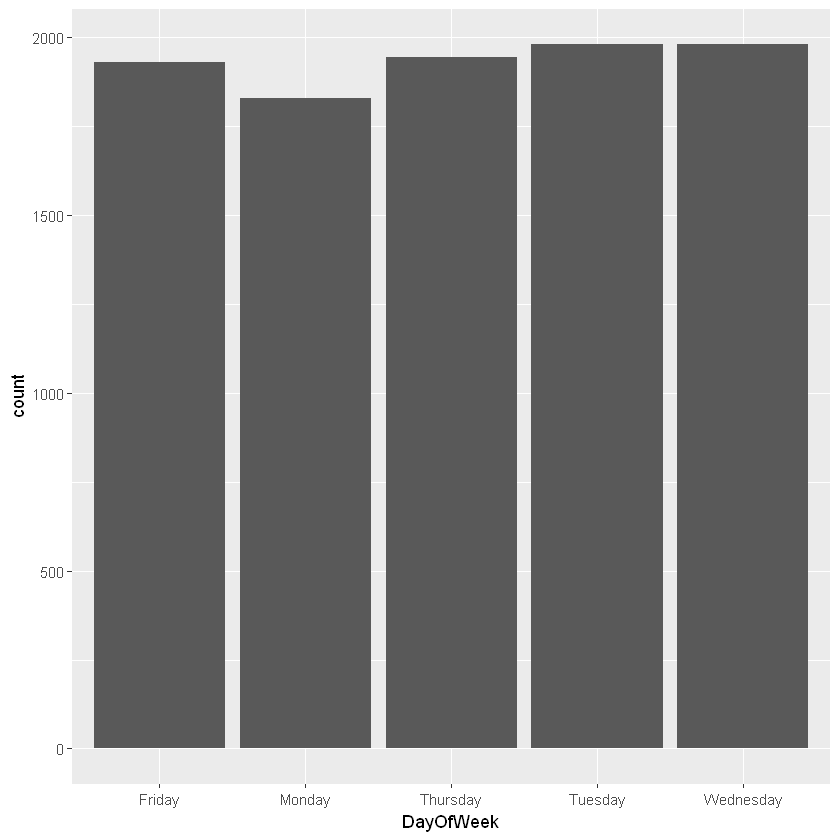

In [103]:
library(ggplot2)

# counts (or sums of weights)
g <- ggplot(df, aes(DayOfWeek))
# Number of cars in each class:
g + geom_bar()